# 矩阵变换

## 矩阵表示法

任何一个线性变换都可以表示为一个矩阵，例如一个二维空间中的旋转变换可以表示为一个 $2 \times 2$ 的矩阵，一个三维空间中的旋转变换可以表示为一个 $3 \times 3$ 的矩阵。


矩阵是由从上到下、从左到右的行和列组成的，例如三个基向量如下：

$
x =
(1, 0, 0) =
\begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}
$
$
y =
(0, 1, 0) =
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}
$
$
z =
(0, 0, 1) =
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
$


将这三个基向量可以组合成一个 $3\times3$ 的矩阵：

$
e =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$

## 旋转矩阵

### 二维旋转矩阵

在二维空间中，可以通过下面的公式计算一个向量绕原点旋转 $\theta$ 角度后的坐标：

$
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$

### 三维旋转矩阵

通过上面的二维旋转矩阵可以得出三维空间中的旋转矩阵，可以将其拓展为三维中沿着 $z$ 轴旋转 $\theta$ 角度的矩阵：

$
\begin{bmatrix}
x' \\
y' \\
z'
\end{bmatrix}
=
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}
$

#### 矩阵计算

当前有一个如下的矩阵：

$
A =
\begin{bmatrix}
A_{11} & A_{12} & A_{13} \\
A_{21} & A_{22} & A_{23} \\
A_{31} & A_{32} & A_{33}
\end{bmatrix}
$

那么可以通过下面的公式计算矩阵 $A$ 与向量 $v$ 的乘积：

$
A \cdot v =
\begin{bmatrix}
A_{11} & A_{12} & A_{13} \\
A_{21} & A_{22} & A_{23} \\
A_{31} & A_{32} & A_{33}
\end{bmatrix}
\begin{bmatrix}
v_{1} \\
v_{2} \\
v_{3}
\end{bmatrix}
=
\begin{bmatrix}
A_{11}v_{1} + A_{12}v_{2} + A_{13}v_{3} \\
A_{21}v_{1} + A_{22}v_{2} + A_{23}v_{3} \\
A_{31}v_{1} + A_{32}v_{2} + A_{33}v_{3}
\end{bmatrix}
=
\begin{bmatrix}
v'_{1} \\
v'_{2} \\
v'_{3}
\end{bmatrix}
$

通过上面的公式可以得出一个矩阵与向量的乘积的计算函数如下：

In [2]:
def matrix_multiply(matrix, vector):
    return tuple(
        sum(matrix[i][j] * vector[j] for j in range(len(vector)))
        for i in range(len(matrix))
    )


print(f'矩阵 A 与向量 v 的乘积为：{matrix_multiply(((0, -1, 0), (0, 1, 0), (0, 0, 1)), (1, 1, 1))}')

矩阵 A 与向量 v 的乘积为：(-1, 1, 1)


#### 旋转矩阵的应用

根据上面的公式，如何当前需要将一个三维向量 $v$ 绕 $z$ 轴旋转 $90$ 度，可以通过下面的 $3\times3$ 的矩阵计算：



$
A =
\begin{bmatrix}
\cos(90°) & -\sin(90°) & 0 \\
\sin(90°) & \cos(90°) & 0 \\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{bmatrix}
$

通过上面的矩阵可以得出一个向量绕 $z$ 轴旋转 $90$ 度的结果，例如将一个向量 $(1, 1, 1)$ 绕 $z$ 轴旋转 $90$ 度的结果为 $(-1, 1, 1)$。

$
\begin{bmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
0 \cdot 1 + -1 \cdot 1 + 0 \cdot 1 \\
1 \cdot 1 + 0 \cdot 1 + 0 \cdot 1 \\
0 \cdot 1 + 0 \cdot 1 + 1 \cdot 1
\end{bmatrix}
=
\begin{bmatrix}
-1 \\
1 \\
1
\end{bmatrix}
$

通过上面的计算，可以得出一个可以将指定向量旋转指定角度的函数如下：

In [3]:
import math


def rotate_z(theta, vector):
    matrix = (
        (math.cos(theta), -math.sin(theta), 0),
        (math.sin(theta), math.cos(theta), 0),
        (0, 0, 1)
    )
    return matrix_multiply(matrix, vector)


print(f'向量 (1, 1, 1) 绕 z 轴旋转 90° 的结果为：{rotate_z(math.pi / 2, (1, 1, 1))}')

向量 (1, 1, 1) 绕 z 轴旋转 90° 的结果为：(-0.9999999999999999, 1.0, 1)


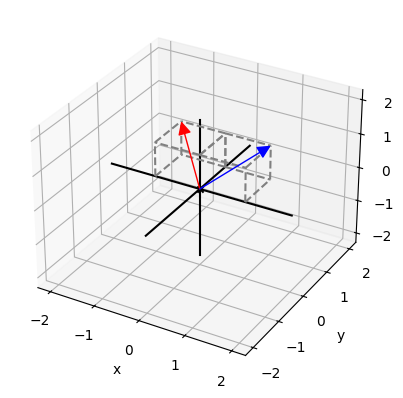

In [4]:
from py_lib.draw3d import draw3d, Arrow3D, Box3D

draw3d(
    Arrow3D((1, 1, 1), (0, 0, 0), color='blue'),
    Box3D(1, 1, 1),
    Arrow3D(rotate_z(math.pi / 2, (1, 1, 1)), (0, 0, 0), color='red'),
    Box3D(*rotate_z(math.pi / 2, (1, 1, 1))),
)

## 缩放矩阵

缩放矩阵可以直接通过下面的公式计算：

$
S =
\begin{bmatrix}
s_{x} & 0 & 0 \\
0 & s_{y} & 0 \\
0 & 0 & s_{z}
\end{bmatrix}
$

通过上面的公式可以对向量的每一个轴实现不同比例的缩放，例如对一个向量 $(1, 1, 1)$ 分别在 $x$ 轴、$y$ 轴、$z$ 轴上缩放 $2$ 倍、$0.5$ 倍、$1$ 倍，可以通过下面的计算得出结果：

$
\begin{bmatrix}
2 & 0 & 0 \\
0 & 0.5 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
2 \cdot 1 + 0 \cdot 1 + 0 \cdot 1 \\
0 \cdot 1 + 0.5 \cdot 1 + 0 \cdot 1 \\
0 \cdot 1 + 0 \cdot 1 + 1 \cdot 1
\end{bmatrix}
=
\begin{bmatrix}
2 \\
0.5 \\
1
\end{bmatrix}
$

通过公式可以得出一个可以对指定向量进行缩放的函数如下：

In [5]:
def scale(s, vector):
    matrix = (
        (s[0], 0, 0),
        (0, s[1], 0),
        (0, 0, s[2])
    )
    return matrix_multiply(matrix, vector)


print(f'向量 (1, 1, 1) 在 x 轴、y 轴、z 轴上分别缩放 2、0.5、1 倍的结果为：{scale((2, 0.5, 1), (1, 1, 1))}')

向量 (1, 1, 1) 在 x 轴、y 轴、z 轴上分别缩放 2、0.5、1 倍的结果为：(2, 0.5, 1)


## 矩阵乘法

正常实践中，向量的变换通常会有多个变换组合而成，例如绕 $z$ 轴旋转 $10$ 度、绕 $x$ 轴旋转 $20$ 度、在 $x$ 轴上缩放 $2$ 倍，可以通过下面的公式计算：

$
\begin{bmatrix}
2 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos(20°) & -\sin(20°) \\
0 & \sin(20°) & \cos(20°)
\end{bmatrix}
\begin{bmatrix}
\cos(10°) & -\sin(10°) & 0 \\
\sin(10°) & \cos(10°) & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
$

上面的公式从右到左一次进行旋转和缩放操作，同时由于旋转和缩放是线性变换，所以从左到右也可以得到相同的结果。

在上面的公式中，可以通过下面的公式实现多多个 $3\times3$ 的矩阵的合并，从而使得已有的向量只通过一个矩阵变换即可得到最终结果：

$
A \cdot B =
\begin{bmatrix}
A_{11} & A_{12} & A_{13} \\
A_{21} & A_{22} & A_{23} \\
A_{31} & A_{32} & A_{33}
\end{bmatrix}
\begin{bmatrix}
B_{11} & B_{12} & B_{13} \\
B_{21} & B_{22} & B_{23} \\
B_{31} & B_{32} & B_{33}
\end{bmatrix}
=
\begin{bmatrix}
(A_{11}, A_{12}, A_{13}) \cdot (B_{11}, B_{21}, B_{31}) & (A_{11}, A_{12}, A_{13}) \cdot (B_{12}, B_{22}, B_{32}) & (A_{11}, A_{12}, A_{13}) \cdot (B_{13}, B_{23}, B_{33}) \\
(A_{21}, A_{22}, A_{23}) \cdot (B_{11}, B_{21}, B_{31}) & (A_{21}, A_{22}, A_{23}) \cdot (B_{12}, B_{22}, B_{32}) & (A_{21}, A_{22}, A_{23}) \cdot (B_{13}, B_{23}, B_{33}) \\
(A_{31}, A_{32}, A_{33}) \cdot (B_{11}, B_{21}, B_{31}) & (A_{31}, A_{32}, A_{33}) \cdot (B_{12}, B_{22}, B_{32}) & (A_{31}, A_{32}, A_{33}) \cdot (B_{13}, B_{23}, B_{33})
\end{bmatrix}
=
\begin{bmatrix}
A_{11}B_{11} + A_{12}B_{21} + A_{13}B_{31} & A_{11}B_{12} + A_{12}B_{22} + A_{13}B_{32} & A_{11}B_{13} + A_{12}B_{23} + A_{13}B_{33} \\
A_{21}B_{11} + A_{22}B_{21} + A_{23}B_{31} & A_{21}B_{12} + A_{22}B_{22} + A_{23}B_{32} & A_{21}B_{13} + A_{22}B_{23} + A_{23}B_{33} \\
A_{31}B_{11} + A_{32}B_{21} + A_{33}B_{31} & A_{31}B_{12} + A_{32}B_{22} + A_{33}B_{32} & A_{31}B_{13} + A_{32}B_{23} + A_{33}B_{33}
\end{bmatrix}
$

通过上面的公式可以得出一个可以对指定向量进行多个变换的函数如下：

In [6]:
from py_lib.vectors import dot


def multiply_matrices(*matrices):
    def multiply(a, b):
        return tuple(
            tuple(dot(row, col) for col in zip(*b))
            for row in a
        )

    # 空参数时返回单位矩阵
    if not matrices:
        return ()

    # 依次相乘所有矩阵
    result = matrices[0]
    for matrix in matrices[1:]:
        result = multiply(result, matrix)
    return result


print(f'绕 z 轴旋转 10° 加绕 x 轴旋转 20° 加在 x 轴上缩放 2 倍的结果为：{
multiply_matrices(
    ((2, 0, 0), (0, 1, 0), (0, 0, 1)),
    ((1, 0, 0), (0, math.cos(math.pi / 9), -math.sin(math.pi / 9)), (0, math.sin(math.pi / 9), math.cos(math.pi / 9))),
    ((math.cos(math.pi / 18), -math.sin(math.pi / 18), 0), (math.sin(math.pi / 18), math.cos(math.pi / 18), 0), (0, 0, 1)),
)
}')

绕 z 轴旋转 10° 加绕 x 轴旋转 20° 加在 x 轴上缩放 2 倍的结果为：((1.969615506024416, -0.34729635533386066, 0.0), (0.16317591116653482, 0.9254165783983234, -0.3420201433256687), (0.0593911746138847, 0.33682408883346515, 0.9396926207859084))


## 平移矩阵

由于平移是非线性变换，所以不可以使用二维向量使用 $2\times2$ 的矩阵表示，但是可以使用齐次坐标的方式将平移变换转换为线性变换。

具体操作就是将二维向量 $(x, y)$ 转换为三维向量 $(x, y, 1)$，然后将平移变换转换为一个 $3\times3$ 的矩阵，具体公式如下：

$
T =
\begin{bmatrix}
1 & 0 & t_{x} \\
0 & 1 & t_{y} \\
0 & 0 & 1
\end{bmatrix}
$

下面代码实现了一个可以对指定二维向量进行平移的示例，首先创建一组二维向量，用于后续的平移变换操作：

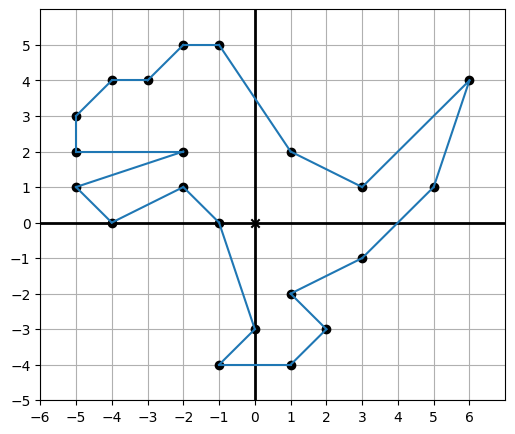

In [8]:
from py_lib.draw2d import draw2d, Points2D, Polygon2D

dino_vectors = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4),
                (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3),
                (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)
                ]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors)
)

首先创建一个平移矩阵，然后通过上面的公式计算平移后的向量：

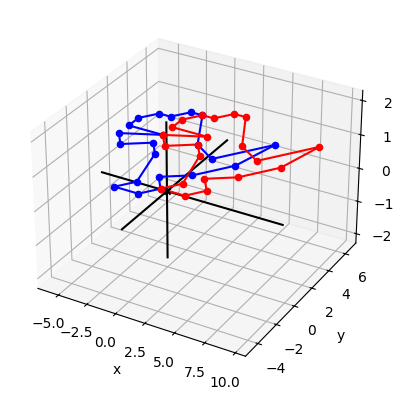

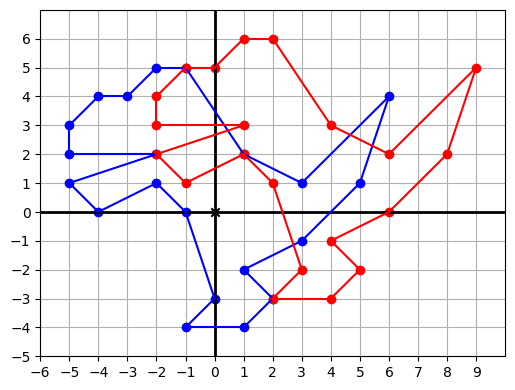

In [26]:
from py_lib.draw3d import draw3d, Points3D, Polygon3D, Segment3D


def polygon_segments_3d(points, color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i + 1) % count], color=color) for i in range(0, count)]


dino_3d = [(x, y, 1) for x, y in dino_vectors]

# 平移矩阵
move_matrix = (
    (1, 0, 3),
    (0, 1, 1),
    (0, 0, 1)
)

translated_dino = [matrix_multiply(move_matrix, vector) for vector in dino_3d]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d),
    Points3D(*translated_dino, color='red'),
    *polygon_segments_3d(translated_dino, color='red'),
)

# 使用2d的方式绘制平移后的图形
draw2d(
    Points2D(*[vector[:2] for vector in dino_3d], color='blue'),
    Polygon2D(*[vector[:2] for vector in dino_3d], color='blue'),
    Points2D(*[vector[:2] for vector in translated_dino], color='red'),
    Polygon2D(*[vector[:2] for vector in translated_dino], color='red')
)

### 组合变换

通过上面的变换矩阵可以将这个二维向量的平移、旋转、缩放等操作组合在一起，例如下面的代码实现了一个将这个二维向量绕原点旋转 $45$ 度、在 $y$ 轴上缩放 $2$ 倍、平移 $(3, 1)$ 的操作：


组合变换矩阵为：((0.7071067811865476, -0.7071067811865476, 3), (1.4142135623730951, 1.4142135623730951, 1), (0.0, 0.0, 1))
向量 (1, 1, 1) 绕原点旋转 45° 的结果为：(0.0, 1.4142135623730951, 1)
向量 (0.0, 1.4142135623730951, 1) 在 y 轴上缩放 2 倍的结果为：(0.0, 2.8284271247461903, 1.0)
向量 (0.0, 2.8284271247461903, 1.0) 平移 (3, 1) 的结果为：(3.0, 3.8284271247461903, 1.0)


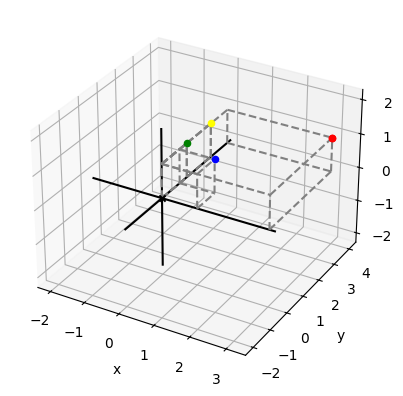

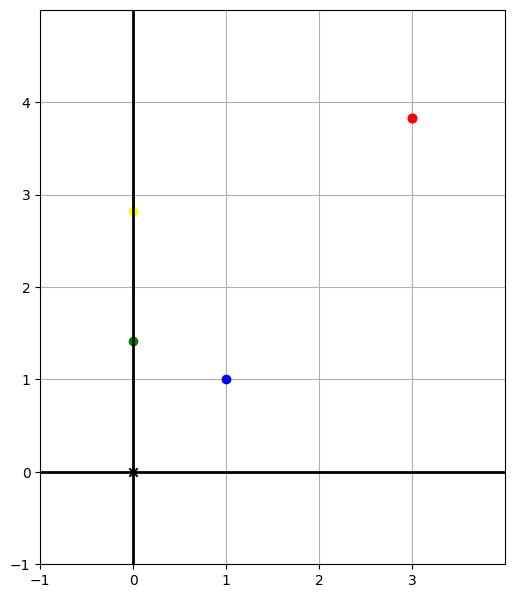

In [47]:
# 旋转矩阵
rotate_matrix = (
    (math.cos(math.pi / 4), -math.sin(math.pi / 4), 0),
    (math.sin(math.pi / 4), math.cos(math.pi / 4), 0),
    (0, 0, 1)
)

# 缩放矩阵
scale_matrix = (
    (1, 0, 0),
    (0, 2, 0),
    (0, 0, 1)
)

# 平移矩阵
move_matrix = (
    (1, 0, 3),
    (0, 1, 1),
    (0, 0, 1)
)

# 组合变换
combined_matrix = multiply_matrices(move_matrix, scale_matrix, rotate_matrix)

print(f'组合变换矩阵为：{combined_matrix}')

origin_vector = (1, 1, 1)
rotated_vector = matrix_multiply(rotate_matrix, origin_vector)
print(f'向量 {origin_vector} 绕原点旋转 45° 的结果为：{rotated_vector}')
scaled_vector = matrix_multiply(scale_matrix, rotated_vector)
print(f'向量 {rotated_vector} 在 y 轴上缩放 2 倍的结果为：{scaled_vector}')
moved_vector = matrix_multiply(move_matrix, scaled_vector)
print(f'向量 {scaled_vector} 平移 (3, 1) 的结果为：{moved_vector}')

# 变换后的向量
draw3d(
    Points3D(origin_vector, color='blue'),
    Box3D(*origin_vector),
    Points3D(rotated_vector, color='green'),
    Box3D(*rotated_vector),
    Points3D(scaled_vector, color='yellow'),
    Box3D(*scaled_vector),
    Points3D(moved_vector, color='red'),
    Box3D(*moved_vector),
    Points3D(*[matrix_multiply(combined_matrix, origin_vector)], color='red')
)

draw2d(
    Points2D(origin_vector[:2], color='blue'),
    Points2D(rotated_vector[:2], color='green'),
    Points2D(scaled_vector[:2], color='yellow'),
    Points2D(moved_vector[:2], color='red'),
    Points2D(*[matrix_multiply(combined_matrix, origin_vector)[:2]], color='red')
)

### 在四维中平移三维向量

与二维向量平移类似，三维向量平移也可以通过齐次坐标的方式将三维向量转换为四维向量，然后将平移变换转换为一个 $4\times4$ 的矩阵，具体公式如下：

$
T =
\begin{bmatrix}
1 & 0 & 0 & t_{x} \\
0 & 1 & 0 & t_{y} \\
0 & 0 & 1 & t_{z} \\
0 & 0 & 0 & 1
\end{bmatrix}
$

下面代码实现了一个可以对指定三维向量进行平移的示例，首先创建一个三维向量，用于后续的平移变换操作：

三维向量 (1, 1, 1) 平移 (2, 1, 2) 的结果为：(3, 2, -1, 1)


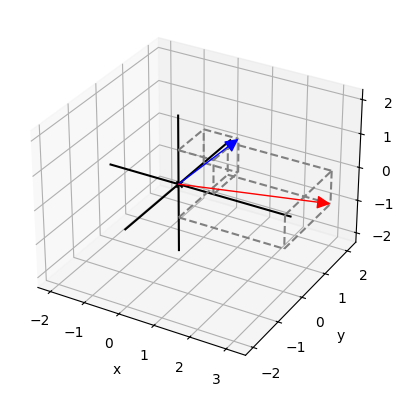

In [52]:
origin_3d_vector = (1, 1, 1)

# 平移矩阵
move_matrix = (
    (1, 0, 0, 2),
    (0, 1, 0, 1),
    (0, 0, 1, -2),
    (0, 0, 0, 1)
)

translated_3d_vector = matrix_multiply(move_matrix, (*origin_3d_vector, 1))

print(f'三维向量 {origin_3d_vector} 平移 (2, 1, -2) 的结果为：{translated_3d_vector}')

draw3d(
    Arrow3D(origin_3d_vector, (0, 0, 0), color='blue'),
    Box3D(*origin_3d_vector),
    Arrow3D(translated_3d_vector[:3], (0, 0, 0), color='red'),
    Box3D(*(translated_3d_vector[:3])),
)